# Chapter 6 - Exercise 4
### Author: *John Benedick Estrada*
---
**Exercise:** In my implementation, the Life class is based on a parent class called `Cell2D`, and the `LifeViewer` class is based on `Cell2DViewer`. You can use these base classes to implement other 2-D cellular automatons.

For example, one variation of GoL, called “Highlife”, has the same rules as GoL, plus one additional rule: a dead cell with 6 neighbors comes to life.

Write a class named Highlife that inherits from Cell2D and implements this version of the rules. Also write a class named HighlifeViewer that inherits from Cell2DViewer and try different ways to visualize the results. As a simple example, use a different colormap.

One of the more interesting patterns in Highlife is the replicator (see http://thinkcomplex.com/repl). Use add_cells to initialize Highlife with a replicator and see what it does.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
from utils import underride

from scipy.signal import correlate2d

### Code from the book

In [2]:
""" Code example from Complexity and Computation, a book about
exploring complexity science with Python.  Available free from

http://greenteapress.com/complexity

Copyright 2016 Allen Downey
MIT License: http://opensource.org/licenses/MIT
"""


class Cell2D:
    """Parent class for 2-D cellular automata."""

    def __init__(self, n, m=None):
        """Initializes the attributes.

        n: number of rows
        m: number of columns
        """
        m = n if m is None else m
        self.array = np.zeros((n, m), np.uint8)

    def add_cells(self, row, col, *strings):
        """Adds cells at the given location.

        row: top row index
        col: left col index
        strings: list of strings of 0s and 1s
        """
        for i, s in enumerate(strings):
            self.array[row+i, col:col+len(s)] = np.array([int(b) for b in s])

    def loop(self, iters=1):
        """Runs the given number of steps."""
        for i in range(iters):
            self.step()

    def draw(self, **options):
        """Draws the array.
        """
        draw_array(self.array, **options)

    def animate(self, frames, interval=None, step=None):
        """Animate the automaton.
        
        frames: number of frames to draw
        interval: time between frames in seconds
        iters: number of steps between frames
        """
        if step is None:
            step = self.step
            
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                step()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass
        

def draw_array(array, **options):
    """Draws the cells."""
    n, m = array.shape
    options = underride(options,
                        cmap='Greens',
                        alpha=0.7,
                        vmin=0, vmax=1, 
                        interpolation='none', 
                        origin='upper',
                        extent=[0, m, 0, n])

    plt.axis([0, m, 0, n])
    plt.xticks([])
    plt.yticks([])

    return plt.imshow(array, **options)

In [3]:
class HighLife(Cell2D):
    """Implementation of High Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 6, 12, 13]] = 1
    
    # Rules:
    #   1.) A dead cell comes to life if it has 3 or 6 live neighbors.
    #   2.) A live cell dies if its number of neighbors is not 2 or 3.
    
    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

#### Parser for GoL portable format in Chapter 6 - Exercise 2 used for "High Life"

In [4]:
def parse_GoL(raw_str):
    IN_ALIVE_CELL = "O"
    IN_DEAD_CELL = "."
    OUT_ALIVE_CELL = "1"
    OUT_DEAD_CELL = "0"
    COMMENT = "!"

    board = []
    str_by_lines = raw_str.split("\n")
    
    for line in str_by_lines:
        board.append("")
        for char in line:
            # Ignore white spaces.
            if char.isspace():
                continue
            # Ignore the remaining characters in the line as they are commented out.
            elif char == COMMENT:
                if len(board[-1]) == 0:
                    board.pop()
                break
            elif char == IN_ALIVE_CELL:
                board[-1] += OUT_ALIVE_CELL
            elif char == IN_DEAD_CELL:
                board[-1] += OUT_DEAD_CELL
            else:
                raise ValueError(f"'{char}' is an invalid character.")
    return board


def make_high_life(n, m, row, col, str_input):
    life = HighLife(n, m)
    life.add_cells(row, col, *parse_GoL(str_input))
    return life

### Demo: Replicator

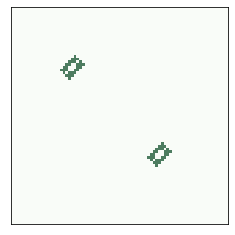

In [5]:
replicator = """
! Name: Replicator
! Source: https://conwaylife.com/w/index.php?title=Replicator
...OOO.
..O..O.
.O...O.
.O..O
.OOO...
"""

replicator_HL = make_high_life(80, 80, 35, 35, replicator)
replicator_HL.animate(100)